In [7]:
from functions import BinPacking, BinPackingNewApproach, new_eq_optimal,  get_figure, interpret, eval_constrains
from functions import mapping_cost
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import CplexOptimizer, MinimumEigenOptimizer
from qiskit.algorithms.optimizers import COBYLA
import numpy as np
from qiskit_optimization.problems.constraint import ConstraintSense
import matplotlib.pyplot as plt

from qiskit import Aer
backend = Aer.get_backend("qasm_simulator")

In [13]:
#np.random.seed(1)
num_items = 5 # number of items
num_bins = num_items # maximum number of bins
max_weight = 15 # max weight of a bin
cases = 10
solutions_new = {}
optimal_new = []
ratio_new = []; new =[]
result_classical = []; result_qaoa_new = []
weights=[]
qaoa = MinimumEigenOptimizer(QAOA(optimizer=COBYLA(maxiter=100), reps=4, quantum_instance=backend))
for i in range(cases): # Testing 5 different randomly selected configurations of the problem
    print(f"----------- Case {i+1} -------------")
    weights.append(np.random.randint(1, max_weight, num_items)) # Randomly picking the item weight
    qubo_new = BinPackingNewApproach(num_items, num_bins, weights[-1], max_weight, alpha=1, simplification=True)
    qubo_classical, qp = BinPacking(num_items, num_bins, weights[-1], max_weight, simplification=True)
    result_classical.append(CplexOptimizer().solve(qubo_classical))
    optimal_new.append(new_eq_optimal(qubo_new, qubo_classical))
    result_qaoa_new.append(CplexOptimizer().solve(qubo_new))
    solutions_new = result_qaoa_new[-1].fval
    new.append(solutions_new)
    check_const = eval_constrains(qp, result_qaoa_new[-1], max_weight)
    print(check_const)
#     ratio_new.append(solutions_new / optimal_new[-1] - 1 < 5e-2 and check_const)

----------- Case 1 -------------
True
----------- Case 2 -------------
False
----------- Case 3 -------------
True
----------- Case 4 -------------
True
----------- Case 5 -------------
True
----------- Case 6 -------------
True
----------- Case 7 -------------
True
----------- Case 8 -------------
True
----------- Case 9 -------------
True
----------- Case 10 -------------
False


In [14]:
constraints = qp.linear_constraints
varN = len(qp.variables)
eval_const = []
for const in constraints:
    eval_const.append(const.evaluate(result_qaoa_new[-1].x[:varN]))
eval_const

[1.0, 1.0, 1.0, 1.0, 0.0, 12.0, 17.0, 0.0, 0.0]

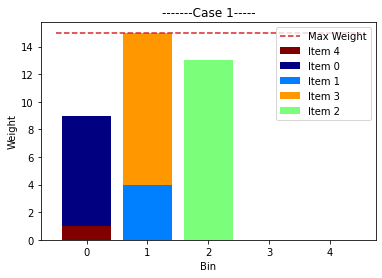

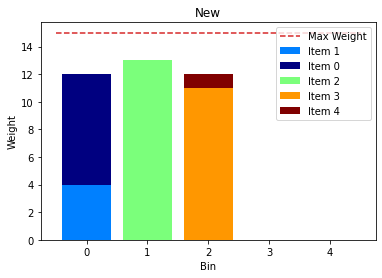

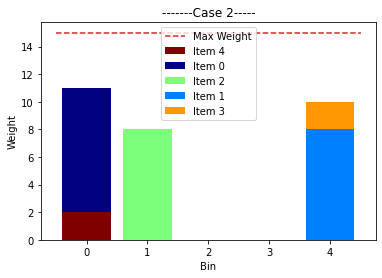

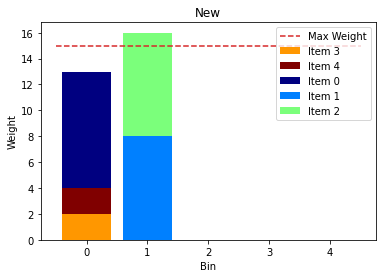

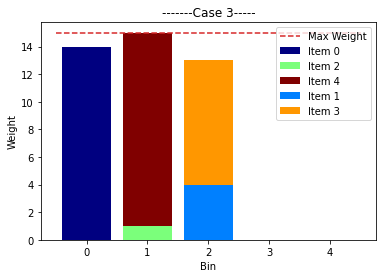

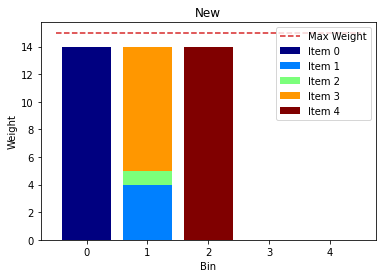

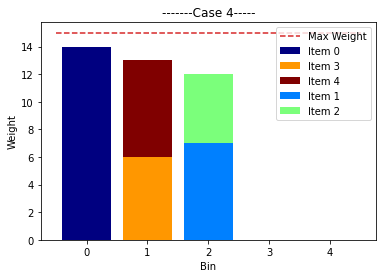

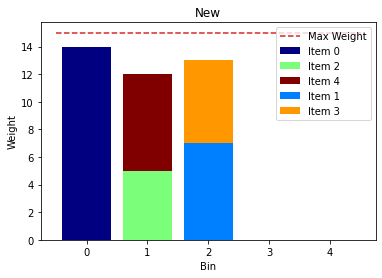

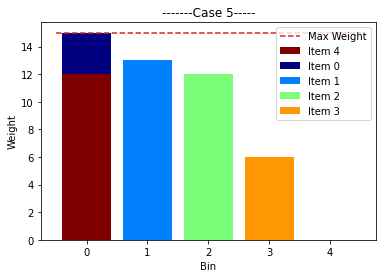

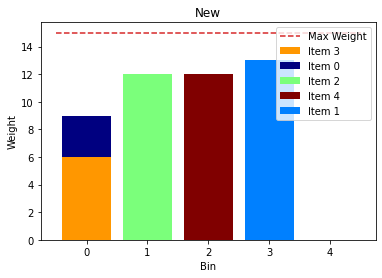

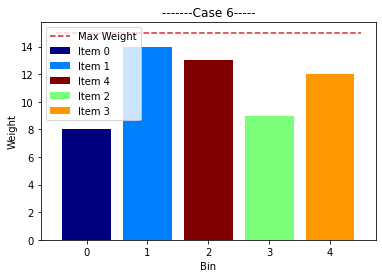

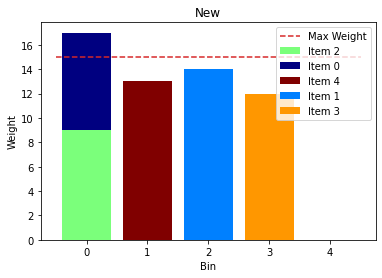

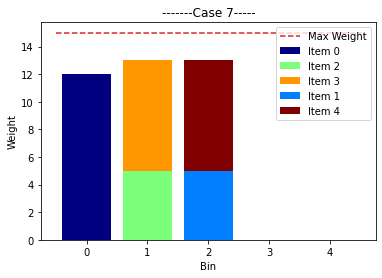

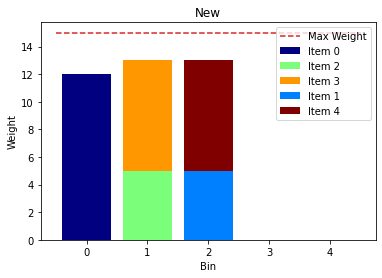

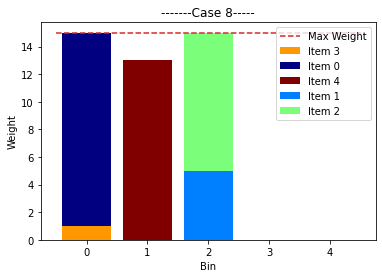

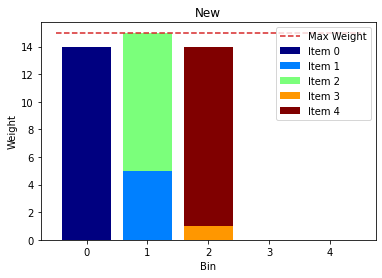

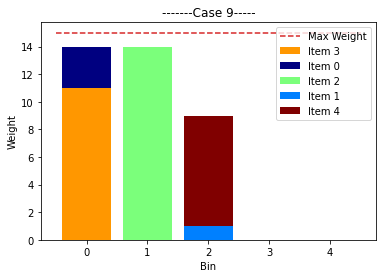

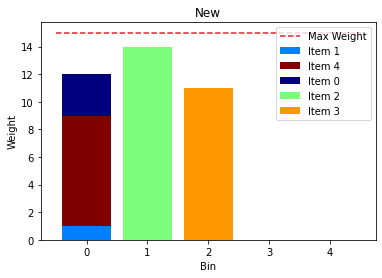

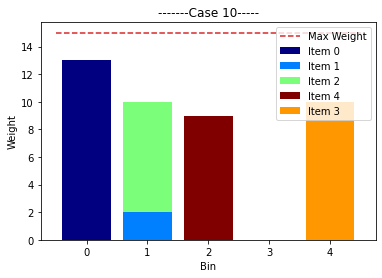

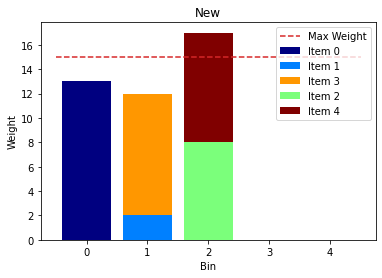

In [15]:
for i in range(len(result_classical)):
    fig = get_figure(interpret(result_classical[i].x, weights[i], max_weight, num_items, num_bins, simplify=True), weights[i], max_weight, title=f"-------Case {i+1}-----")
    fig = get_figure(interpret(result_qaoa_new[i].x, weights[i], max_weight, num_items, num_bins, simplify=True), weights[i], max_weight, title="New")

In [16]:
n = 20
alpha = np.linspace(0, 2*np.pi, n)
beta = np.linspace(0, np.pi, n)
map_cost = mapping_cost(alpha, beta, qubo_new)

Text(0, 0.5, '$\\alpha$')

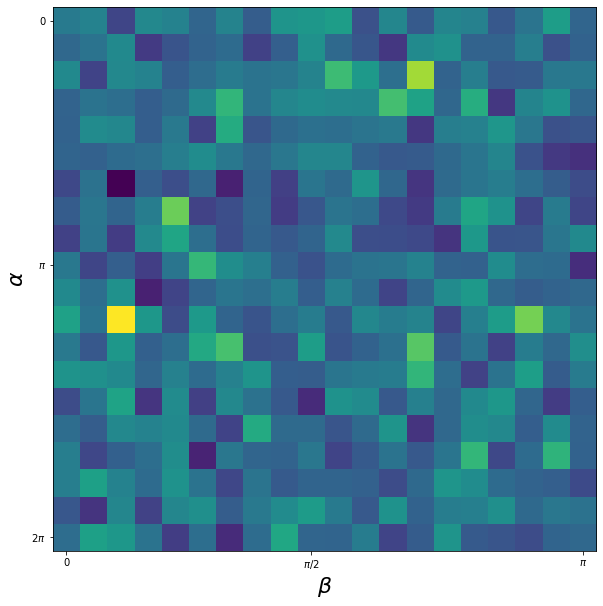

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(map_cost)
plt.xticks([0,9,19], ["0", r"$\pi/2$", r"$\pi$"])
plt.yticks([0,9,19], ["0", r"$\pi$", r"2$\pi$"])
plt.xlabel(r"$\beta$", fontsize=22)
plt.ylabel(r"$\alpha$", fontsize=22)